In [1]:
from IPython.core.pylabtools import figsize

import grover_feature_qasm as gfq
import grover_sat_qasm_new as gsq
import grover_sat as gs
from qiskit.qasm3 import loads
from matplotlib import pyplot as plt
import numpy as np
from typing import Dict

# Evaluating Depth Calculation

To evaluate the depth calculation we will compare the calculated depth to the one calculated by qiskit circuits, created using the ```parse()``` method.

In [65]:
models = {
    "car" : "car.xml",
    "sandwich" : "sandwich.xml",
    "bike" : "bike.xml",
    "axTLS": "axTLS.xml",
    "uClibc" : "uClibc.xml",
    "busybox": "busybox.xml"
}
k=1
gates = ["$U_{ksat}$", "U$_{oracle}$","$U_{diffuser}$", "U$_{Diffuser}$", "$U_{clause}$", "$U_{and}$", "$U_{or}$"] + [
        f"circuit-{i}_dg" for i in range(500)]
qasms = {model:gsq.create_grover_for_model(f"../benchmarks/featureide-examples/{models[model]}", k=k) for model in models.keys()}
circuits = {model:loads(qasms[model][0].to_qasm()) for model in models.keys()}

Error can only parse xml files


Exception: Can only parse xml files

In [5]:
models = {
    "car" : "car.xml",
    "sandwich" : "sandwich.xml",
    "bike" : "bike.xml",
    "axTLS": "axTLS.xml",
    "uClibc" : "uClibc.xml",
    "busybox": "busybox.xml"
}
results = {k:[] for k in models.keys()}
k=1
for model,file in models.items():
    qasm, _ = gfq.init_feature_circuit(f"../benchmarks/featureide-examples/{file}", k=k)
    circuit = loads(qasm.to_qasm())
    results[model].append((qasm.calculate_depth()[0], qasm.calculate_adapted_depth()[0], circuit.depth()))

In [8]:
gsq.create_grover_for_model(f"../benchmarks/featureide-examples/car.xml", k=k)[0].calculate_depth()[0]

23

# Evaluating Circuit Properties

To evaluate the circuit properties we will compare our different designs to the original implementation. 


In [7]:
models = {
    "car": "car",
    "sandwich": "sandwich",
    "bike": "bike",
    "axTLS": "axTLS",
    "uClibc" : "uClibc",
    "busybox": "busybox",
    # "EMBToolkit": "EMBToolkit",
}
results_width = {k: [] for k in models.keys()}
simulate = True
shots = 10000
k = 1
gates = ["$U_{ksat}$", "U$_{oracle}$", "$U_{diffuser}$", "U$_{Diffuser}$", "$U_{clause}$", "$U_{and}$", "$U_{or}$"] + [
    f"circuit-{i}_dg" for i in range(500)]
for model, file in models.items():
    print(model)
    for i in range(1):
        print(i)
        feature_qasm, _ = gfq.init_feature_circuit(f"../benchmarks/featureide-examples/{file}.xml", k=k)
        print("feat")
        qasm, _ = gsq.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.dimacs", k=k)
        print("qasm")
        try:
            circuit, _ = gs.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.dimacs", k=k)
            print("old")
        except:
            print("failed")
            print(feature_qasm.calculate_depth()[0], qasm.calculate_depth()[0])
            results[model].append((feature_qasm.calculate_depth()[0], qasm.calculate_depth()[0], 0))        
            continue
        result = feature_qasm.width(), qasm.width(), circuit.num_qubits 
        print(result)
        results_width[model].append((result))
    print("------")

car
0
feat
qasm
old
(21, 28, 28)
------
sandwich
0
feat
qasm
old
(35, 47, 47)
------
bike
0
feat
qasm
old
(92, 182, 182)
------
axTLS
0
feat


/home/marwin/Documents/University/bachelor-thesis/qc-configuration-problem/configproblem/util/cnf.py:323: UserWarning: Clauses Mismatch between dimacs input and generated CNF! dimacs 183 / cnf 177
  warnings.warn(f"Clauses Mismatch between dimacs input and generated CNF! dimacs {dimacs_reader.nClauses} / cnf {nClauses}")


KeyboardInterrupt: 

In [ ]:
results_width

In [64]:
models = {
    "car": "car",
    "sandwich": "sandwich",
    "bike": "bike",
    "axTLS": "axTLS",
    "uClibc" : "uClibc",
    "busybox": "busybox",
}
results_width = {k: [] for k in models.keys()}
simulate = True
shots = 10000
k = 1
gates = ["$U_{ksat}$", "U$_{oracle}$", "$U_{diffuser}$", "U$_{Diffuser}$", "$U_{clause}$", "$U_{and}$", "$U_{or}$"] + [
    f"circuit-{i}_dg" for i in range(500)]
for model, file in models.items():
    print(model)
    try:
        print("feat")
        feature_qasm, _ = gfq.init_feature_circuit(f"../benchmarks/featureide-examples/{file}.xml", k=k)
        result_feat = gs.collect_circuit_info(loads(feature_qasm.to_qasm()))
    except:
        result_feat = -1
        print("failed")     
        continue
    
    try:
        print("qasm")
        qasm, _ = gsq.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.dimacs", k=k)
        result_qasm = gs.collect_circuit_info(loads(qasm.to_qasm()))
    except:
        result_qasm = -1
        print("failed")     
        continue
    
    try:
        print("old")
        circuit, _ = gs.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.dimacs", k=k)
        result_old = gs.collect_circuit_info(circuit)
    except:
        result_old = -1
        print("failed")     
        continue
    
    result = result_feat, result_qasm, result_old
    print(result)
    results_width[model].append(result)
    
        
    print("------")

car
feat
qasm
old
({'depth': 26, 'width': 21}, {'depth': 32, 'width': 28}, {'depth': 32, 'width': 28})
------
sandwich
feat
qasm
old
({'depth': 26, 'width': 35}, {'depth': 32, 'width': 47}, {'depth': 32, 'width': 47})
------
bike
feat
qasm
old
({'depth': 40, 'width': 92}, {'depth': 76, 'width': 182}, {'depth': 76, 'width': 182})
------
axTLS
feat
qasm


/home/marwin/Documents/University/bachelor-thesis/qc-configuration-problem/configproblem/util/cnf.py:323: UserWarning: Clauses Mismatch between dimacs input and generated CNF! dimacs 183 / cnf 177
  warnings.warn(f"Clauses Mismatch between dimacs input and generated CNF! dimacs {dimacs_reader.nClauses} / cnf {nClauses}")


old
({'depth': 204, 'width': 296}, {'depth': 216, 'width': 274}, {'depth': 216, 'width': 274})
------
uClibc
feat
qasm


/home/marwin/Documents/University/bachelor-thesis/qc-configuration-problem/configproblem/util/cnf.py:323: UserWarning: Clauses Mismatch between dimacs input and generated CNF! dimacs 1240 / cnf 1239
  warnings.warn(f"Clauses Mismatch between dimacs input and generated CNF! dimacs {dimacs_reader.nClauses} / cnf {nClauses}")


old
({'depth': 606, 'width': 1103}, {'depth': 480, 'width': 1553}, {'depth': 480, 'width': 1553})
------
busybox
feat
qasm


/home/marwin/Documents/University/bachelor-thesis/qc-configuration-problem/configproblem/util/cnf.py:323: UserWarning: Clauses Mismatch between dimacs input and generated CNF! dimacs 1163 / cnf 1124
  warnings.warn(f"Clauses Mismatch between dimacs input and generated CNF! dimacs {dimacs_reader.nClauses} / cnf {nClauses}")


old
({'depth': 1342, 'width': 2558}, {'depth': 1004, 'width': 1979}, {'depth': 1004, 'width': 1979})
------


# Evaluate Circuit Creation Limit

In [19]:
def align_qubits(counts: Dict[str, int], from_dic: Dict[str, int], to_dic: Dict[str, int]):
        l: Dict[int, int] = {}
        for name, index in from_dic.items():
            l[index] = to_dic[name]
        r: Dict[str, int] = {}
        for key in counts.keys():
            new = ["" for _ in range(len(key))]
            for i in range(len(key)):
                new[len(key) - 1 - l[i]] = key[len(key) - 1 - i]
            r["".join(new)] = counts[key]
        return r

In [20]:
models = {
    "sandwich": "sandwich-medium",
}
results_shots = {}
simulate = True
shots = 10000
k = 2
gates = ["$U_{ksat}$", "U$_{oracle}$", "$U_{diffuser}$", "U$_{Diffuser}$", "$U_{clause}$", "$U_{and}$", "$U_{or}$"] + [
    f"circuit-{i}_dg" for i in range(500)]
for model, file in models.items():
    print(model)
    feature_qasm, feature_alignment = gfq.init_feature_circuit(f"../benchmarks/featureide-examples/{file}.xml", k=k)
    qasm, qasm_alignment = gsq.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.xml", k=k)
    circuit, old_alignment = gs.create_grover_for_model(f"../benchmarks/featureide-examples/{file}.xml", k=k)
    
    result_feat = gs.collect_circuit_info(loads(feature_qasm.to_qasm()), shots=shots, simulate=simulate)
    result_qasm = gs.collect_circuit_info(loads(qasm.to_qasm()), shots=shots, simulate=simulate)
    result_qasm["counts"] = align_qubits(result_qasm["counts"], qasm_alignment, feature_alignment)
    result_old = gs.collect_circuit_info(circuit, shots=shots, simulate=simulate)
    result_old["counts"] = align_qubits(result_old["counts"], old_alignment, feature_alignment)
    results_shots[model]= result_feat, result_qasm, result_old

sandwich


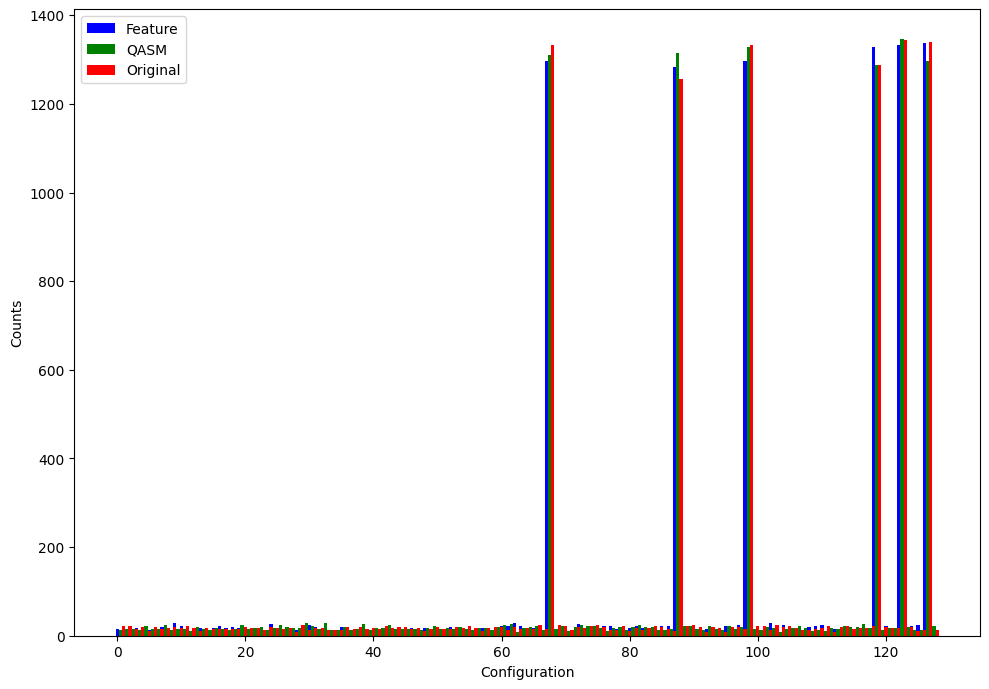

In [63]:
keys = sorted(results_shots["sandwich"][0]["counts"].keys())
counts_feat = [results_shots["sandwich"][0]["counts"][key] for key in keys]
counts_qasm = [results_shots["sandwich"][1]["counts"][key] for key in keys]
counts_old = [results_shots["sandwich"][2]["counts"][key] for key in keys]

fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(len(keys))
bar_width = 0.5
opacity = 1

rects1 = plt.bar(index, counts_feat, bar_width,
alpha=opacity,
color='b',
label='Feature')

rects2 = plt.bar(index + bar_width, counts_qasm, bar_width,
alpha=opacity,
color='g',
label='QASM')

rects3 = plt.bar(index + 2 * bar_width, counts_old, bar_width,
alpha=opacity,
color='r',
label='Original')

ax.set_ylabel("Counts")
ax.set_xlabel("Configuration")
plt.legend()

plt.tight_layout()
plt.show()

<BarContainer object of 128 artists>

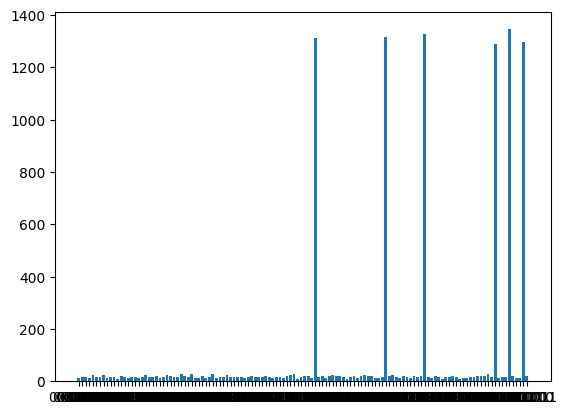

In [22]:
keys = sorted(results_shots["sandwich"][1]["counts"].keys())
counts = [results_shots["sandwich"][1]["counts"][key] for key in keys]
plt.bar(keys, counts)

<BarContainer object of 128 artists>

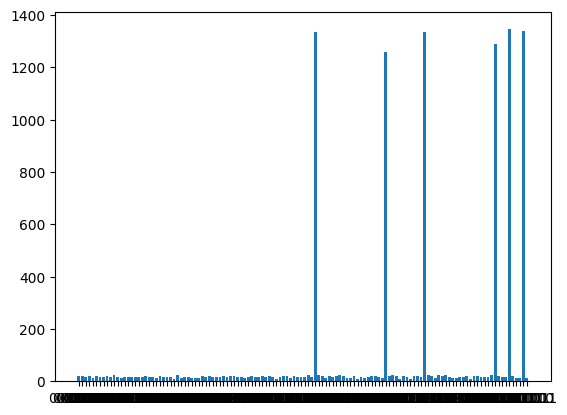

In [23]:
keys = sorted(results_shots["sandwich"][2]["counts"].keys())
counts = [results_shots["sandwich"][2]["counts"][key] for key in keys]
plt.bar(keys, counts)